# San Francisco city employee salary data

<br>
<img src="img/san_francisco.png">
<br>

Um dos conjuntos de dados mais populares que as cidades normalmente lançam é sua estrutura salarial.

Foi processado e enviado o conjunto de dados de salários do SF para entender melhor como São Francisco paga a seus funcionários e o que isso pode nos informar sobre como a sede da cidade está sendo adminstrada.

Inicilamente, pede-se a média salarial das 10 profissões com maior incidência no relatório, considerando o ano de 2014, com uma visualização de sua distribuição.

Alguns ângulos potencialmente interessantes de exploração:

- Quantos trabalhadores ganham acima e abaixo da média na função de Deputy Sheriff?
- Das 200 profissões com maior incidência, qual delas tem média de ganhos acima e abaixo da média do salário de Seputy Sheriff?

Levante algumas hipóteses a sua escolha e comprove se é possível não-rejeitar ou rejeitar, respondendo se as médias são estatisticamente iguais/equivalentes ou estatisticamente diferentes/significativas.

In [2]:
# importando as bibiotecas
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
# ignorando os warnings
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


In [3]:
# Lendo e armazenando os daods em um DataFrame
df_raw = pd.read_csv('C:/Users/Luiz Philipe Rangel/Dropbox/PC/Desktop/TERA - AULAS\Aula 13 - Testes de hipotes e calculo de amostragem/data/SanFrancisco_salaries.csv')

In [62]:
df_raw.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [63]:
df_raw.tail()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014,NaN,San Francisco,PT


In [64]:
df = df_raw.copy()

In [65]:
# verificando o tamnho do DataFrame
df.shape

(148654, 13)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [70]:
#Aqui vamos considerar apenas 2014
df =df[df.Year == 2014]

In [71]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
110531,110532,David Shinn,Deputy Chief 3,129150.01,0.0,342802.63,38780.04,471952.64,510732.68,2014,NaN,San Francisco,PT
110532,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,NaN,San Francisco,FT
110533,110534,William J Coaker Jr.,Chief Investment Officer,257340.0,0.0,82313.7,96570.66,339653.70,436224.36,2014,NaN,San Francisco,PT
110534,110535,Gregory P Suhr,Chief of Police,307450.04,0.0,19266.72,91302.46,326716.76,418019.22,2014,NaN,San Francisco,FT
110535,110536,Joanne M Hayes-White,"Chief, Fire Department",302068.0,0.0,24165.44,91201.66,326233.44,417435.10,2014,NaN,San Francisco,FT


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38123 entries, 110531 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                38123 non-null  int64  
 1   EmployeeName      38123 non-null  object 
 2   JobTitle          38123 non-null  object 
 3   BasePay           38123 non-null  object 
 4   OvertimePay       38123 non-null  object 
 5   OtherPay          38123 non-null  object 
 6   Benefits          38123 non-null  object 
 7   TotalPay          38123 non-null  float64
 8   TotalPayBenefits  38123 non-null  float64
 9   Year              38123 non-null  int64  
 10  Notes             0 non-null      float64
 11  Agency            38123 non-null  object 
 12  Status            38119 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 4.1+ MB


0

In [83]:
# contagem percentual dos dez maiores ocupações
df.JobTitle.value_counts(3).nlargest(10)

Transit Operator                0.065026
Special Nurse                   0.038769
Registered Nurse                0.032369
Public Svc Aide-Public Works    0.024027
Firefighter                     0.021378
Custodian                       0.021090
Police Officer 3                0.020539
Recreation Leader               0.018099
Patient Care Assistant          0.017103
Deputy Sheriff                  0.016184
Name: JobTitle, dtype: float64

In [85]:
# armazenar a série das dez maiores ocupações em uma vairável jobs
jobs = df.JobTitle.value_counts(3).nlargest(10).index
jobs

Index(['Transit Operator', 'Special Nurse', 'Registered Nurse',
       'Public Svc Aide-Public Works', 'Firefighter', 'Custodian',
       'Police Officer 3', 'Recreation Leader', 'Patient Care Assistant',
       'Deputy Sheriff'],
      dtype='object')

In [87]:
# cálculo da média dos salários das dez maiores ocupações 

keys = []
values = []
salaries_list = []

for job in jobs:
    keys.append(job)
    values.append(round(df[df['JobTitle'] == job]['TotalPay'].mean(),2))
    
salaries_list = list(zip(keys, values))
salaries_list

[('Transit Operator', 61318.26),
 ('Special Nurse', 33490.35),
 ('Registered Nurse', 117023.1),
 ('Public Svc Aide-Public Works', 9318.18),
 ('Firefighter', 138998.25),
 ('Custodian', 48750.94),
 ('Police Officer 3', 136059.62),
 ('Recreation Leader', 7061.69),
 ('Patient Care Assistant', 47670.31),
 ('Deputy Sheriff', 115208.99)]

In [88]:
# armanzenando os salários das dez maiores ocupações em um DataFrame
df_salaries = pd.DataFrame(salaries_list,columns=['profession','salary'])
df_salaries.sort_values(by=['salary'],ascending=False)

,profession,salary
4,Firefighter,138998.25
6,Police Officer 3,136059.62
2,Registered Nurse,117023.10
9,Deputy Sheriff,115208.99
0,Transit Operator,61318.26
5,Custodian,48750.94
8,Patient Care Assistant,47670.31
1,Special Nurse,33490.35
3,Public Svc Aide-Public Works,9318.18
7,Recreation Leader,7061.69


<AxesSubplot:xlabel='profession'>

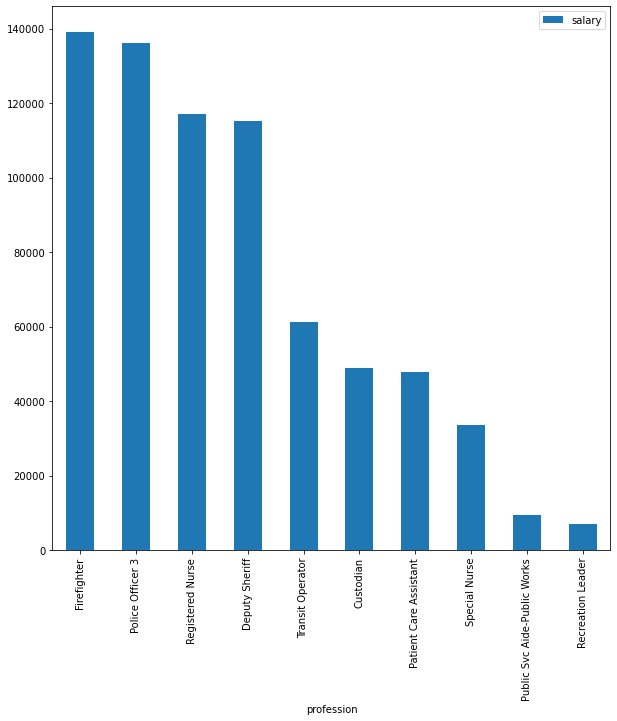

In [93]:
# plotando os salários das dez maiores ocupações em ordem decrescente
df_salaries.sort_values(by=['salary'],ascending=False).plot.bar(x = 'profession', y = 'salary', figsize=(10,10))

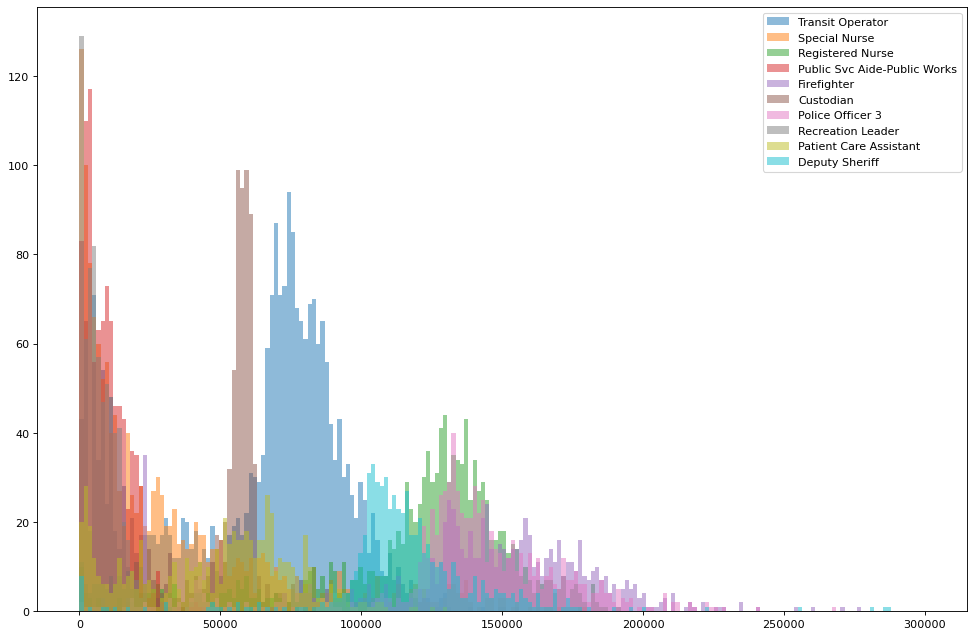

In [95]:
# plotando as distribuições dos salários das dez maiores ocupações

from matplotlib import pyplot
%matplotlib inline

bins = 200

from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=80)

for j in jobs:
    ax = pyplot.hist(df[df['JobTitle'] == j]['TotalPay'], bins, alpha=0.5, label=j, range=(0,300000))

pyplot.legend(loc='upper right')
pyplot.show()

In [96]:
# Quantos trabalhadores ganham acima e abaixo da média na função de Deputy Sheriff?

In [98]:
# inofrmações básicas do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38123 entries, 110531 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                38123 non-null  int64  
 1   EmployeeName      38123 non-null  object 
 2   JobTitle          38123 non-null  object 
 3   BasePay           38123 non-null  object 
 4   OvertimePay       38123 non-null  object 
 5   OtherPay          38123 non-null  object 
 6   Benefits          38123 non-null  object 
 7   TotalPay          38123 non-null  float64
 8   TotalPayBenefits  38123 non-null  float64
 9   Year              38123 non-null  int64  
 10  Notes             0 non-null      float64
 11  Agency            38123 non-null  object 
 12  Status            38119 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 4.1+ MB


<AxesSubplot:>

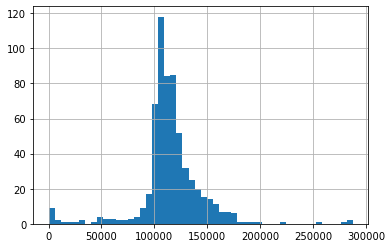

In [99]:
# Plotagem da distribuição dos salários da ocupação "Deputy Sheriff"
df[df.JobTitle == 'Deputy Sheriff']['TotalPay'].hist(bins=50)

In [100]:
# cálculo da média e desvio-padrão da série de salários dos "Deputy Sheriff"

x = df[df.JobTitle == 'Deputy Sheriff']['TotalPay']

mu = np.mean(x)
std = np.std(x)
mu,std

(115208.985623987, 30215.546311505856)

In [101]:
# cálculo da densidade de probabilidade para dois desvios-padrão
scipy.stats.norm(mu, std).pdf(2*std/(len(x)**0.5))

1.2464167903574648e-08

In [102]:
# cálculo do intervalo de confiança para 95% de nível de confiança
scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)

(55987.60308023345, 174430.36816774055)

In [103]:
#Como a distribuição já tem um perfil normal, vamos padronizar os dados e fazer a inferência

In [105]:
# definição de um DataFrmae somente com os salários de 'Deputy Sheriff'
sheriff = df[df.JobTitle == 'Deputy Sheriff']
sheriff.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
110574,110575,Antonio B Santiago,Deputy Sheriff,94191.04,173547.73,19740.81,38238.57,287479.58,325718.15,2014,NaN,San Francisco,FT
110577,110578,Barry J Bloom,Deputy Sheriff,94191.13,173178.23,17960.11,38171.49,285329.47,323500.96,2014,NaN,San Francisco,FT
110583,110584,Whitney P Yee,Deputy Sheriff,94191.0,169659.92,16813.46,38311.07,280664.38,318975.45,2014,NaN,San Francisco,FT
110652,110653,Kristian C Dejesus,Deputy Sheriff,93475.61,148147.92,13499.02,37450.54,255122.55,292573.09,2014,NaN,San Francisco,FT
110890,110891,Suzette F Humphrey,Deputy Sheriff,94191.0,110046.42,18959.14,39011.27,223196.56,262207.83,2014,NaN,San Francisco,FT


<AxesSubplot:>

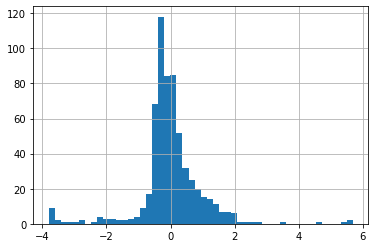

In [106]:
# padronizando os dados da série de salários de "Deputy Sheriff"
sheriff['norm_pay'] = (sheriff['TotalPay'] - sheriff['TotalPay'].mean()) / sheriff['TotalPay'].std()
sheriff['norm_pay'].hist(bins=50)

In [107]:
# verificando o número de observações
len(sheriff['norm_pay'])

617

In [108]:
# calculando a média e o desvio-padrão dos salários de 'Deputy Sheriff'
x = sheriff['norm_pay']

mu = np.mean(x)
std = np.std(x)
mu,std

(9.723898257819038e-16, 0.9991892986101535)

In [109]:
# Verificando o Z-score dos salários de 'Deputy Sheriff'

scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)

(-1.9583750390137373, 1.958375039013739)

In [110]:
# Verificando o p-values dos salários de 'Deputy Sheriff'

scipy.stats.norm(mu, std).pdf(2*std)

0.05403477257841752

In [111]:
#Deputy Sheriff que ganham abaixo da média salarial

In [112]:
# filtro dos "Deputy Sheriff" abaixo no salário médio com 95% de confiança
sheriff[sheriff['norm_pay']<scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)[0]]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,norm_pay
136633,136634,David L Lara,Deputy Sheriff,45236.80,0.00,10378.07,15921.19,55614.87,71536.06,2014,NaN,San Francisco,PT,-1.970701
136734,136735,James M Miller,Deputy Sheriff,50215.78,1050.24,1237.37,17981.07,52503.39,70484.46,2014,NaN,San Francisco,PT,-2.073593
137232,137233,Robert A Rose,Deputy Sheriff,39450.20,3300.24,7725.64,14981.19,50476.08,65457.27,2014,NaN,San Francisco,PT,-2.140634
137375,137376,Orlando S Arias,Deputy Sheriff,46035.52,0.00,1870.49,16549.59,47906.01,64455.60,2014,NaN,San Francisco,PT,-2.225623
137403,137404,John C K Jardin,Deputy Sheriff,45184.41,2827.04,189.74,16070.34,48201.19,64271.53,2014,NaN,San Francisco,PT,-2.215862
137628,137629,Brandie N Ancheta,Deputy Sheriff,38115.21,3490.40,4042.89,15728.74,45648.50,61377.24,2014,NaN,San Francisco,PT,-2.300276
137675,137676,Wilton Wong,Deputy Sheriff,35843.00,2720.35,9330.94,12952.29,47894.29,60846.58,2014,NaN,San Francisco,PT,-2.226011
139342,139343,Kyle C Curry,Deputy Sheriff,29610.58,0.00,1855.61,10246.52,31466.19,41712.71,2014,NaN,San Francisco,PT,-2.769267
139517,139518,Patti A Flynn,Deputy Sheriff,28376.78,0.00,1919.30,9811.87,30296.08,40107.95,2014,NaN,San Francisco,PT,-2.807961
140382,140383,Kenneth C Devin,Deputy Sheriff,22321.25,0.00,1339.17,7730.54,23660.42,31390.96,2014,NaN,San Francisco,PT,-3.027393


In [113]:
len(sheriff[sheriff['norm_pay']<scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)[0]])

23

In [ ]:
# OBS: 23 profissionais Deputy Sheriff ganham abaixo da média

In [114]:
#Deputy Sheriff que ganham acima da média salarial

In [115]:
# filtro dos "Deputy Sheriff" abaixo no salário médio com 95% de confiança
sheriff[sheriff['norm_pay']>scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)[1]]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,norm_pay
110574,110575,Antonio B Santiago,Deputy Sheriff,94191.04,173547.73,19740.81,38238.57,287479.58,325718.15,2014,NaN,San Francisco,FT,5.696767
110577,110578,Barry J Bloom,Deputy Sheriff,94191.13,173178.23,17960.11,38171.49,285329.47,323500.96,2014,NaN,San Francisco,FT,5.625666
110583,110584,Whitney P Yee,Deputy Sheriff,94191.0,169659.92,16813.46,38311.07,280664.38,318975.45,2014,NaN,San Francisco,FT,5.471397
110652,110653,Kristian C Dejesus,Deputy Sheriff,93475.61,148147.92,13499.02,37450.54,255122.55,292573.09,2014,NaN,San Francisco,FT,4.626762
110890,110891,Suzette F Humphrey,Deputy Sheriff,94191.0,110046.42,18959.14,39011.27,223196.56,262207.83,2014,NaN,San Francisco,FT,3.571010
111439,111440,Ivan J Cordoba,Deputy Sheriff,93409.02,91111.63,15289.52,37885.21,199810.17,237695.38,2014,NaN,San Francisco,FT,2.797652
111659,111660,Richard H Lee,Deputy Sheriff,94191.02,86984.11,13993.85,37561.65,195168.98,232730.63,2014,NaN,San Francisco,FT,2.644174
111925,111926,Michael C Li,Deputy Sheriff,94191.02,81865.68,13033.71,37490.71,189090.41,226581.12,2014,NaN,San Francisco,FT,2.443164
112293,112294,Andrew M Martinez Iii,Deputy Sheriff,94191.0,76888.57,9800.52,36637.62,180880.09,217517.71,2014,NaN,San Francisco,FT,2.171659
112471,112472,Anthony D Bryant,Deputy Sheriff,94191.03,71503.19,11337.49,36719.09,177031.71,213750.80,2014,NaN,San Francisco,FT,2.044398


In [116]:
len(sheriff[sheriff['norm_pay']>scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)[1]])

12

In [117]:
# OBS: 121 profissionais Deputy Sheriff ganham acima da média

In [118]:
# Das 200 profissões com maior incidência, qual delas tem média de ganhos acima e abaixo da média do salário de Seputy Sheriff?

In [122]:
# verificando todas as profissiões do DataSet
df.JobTitle.unique()

array(['Deputy Chief 3', 'Asst Med Examiner', 'Chief Investment Officer',
       'Chief of Police', 'Chief, Fire Department', 'Dept Head V',
       'Executive Contract Employee', 'Battalion Chief, Fire Suppress',
       'Asst Chf of Dept (Fire Dept)', 'Gen Mgr, Public Trnsp Dept',
       'Senior Physician Specialist', 'Commander 3',
       'Dep Chf of Dept (Fire Dept)', 'Administrator, DPH', 'Mayor',
       'Adm, SFGH Medical Center', 'Controller', 'Anesthetist',
       'Dep Dir V', 'Port Director', 'Manager, Dept Public Health',
       'Deputy Sheriff', 'Assistant Deputy Chief 2', 'Deputy Dir II, MTA',
       'Firefighter', 'Emergency Medical Svcs Chief', 'Manager VIII',
       'District Attorney', 'Inspector 3', 'Captain 3',
       'Captain, Fire Suppression', 'Nursing Supervisor',
       'Lieut,Fire Prev', 'Dept Head IV', 'City Attorney',
       'EMT/Paramedic/Firefighter', 'Police Officer 3',
       'Lieutenant, Fire Suppression', 'Sheriff (SFERS)', 'Dep Dir IV',
       'Nurse Mana

<AxesSubplot:>

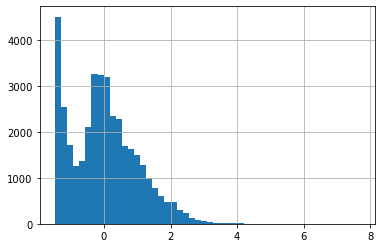

In [124]:
# normalizando todos os valores de salário
df['norm_pay'] = (df['TotalPay'] - df['TotalPay'].mean()) / df['TotalPay'].std()
df['norm_pay'].hist(bins=50)

In [126]:
# verificando os dados
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,norm_pay
110531,110532,David Shinn,Deputy Chief 3,129150.01,0.0,342802.63,38780.04,471952.64,510732.68,2014,NaN,San Francisco,PT,7.669367
110532,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,NaN,San Francisco,FT,6.086305
110533,110534,William J Coaker Jr.,Chief Investment Officer,257340.0,0.0,82313.7,96570.66,339653.70,436224.36,2014,NaN,San Francisco,PT,5.110280
110534,110535,Gregory P Suhr,Chief of Police,307450.04,0.0,19266.72,91302.46,326716.76,418019.22,2014,NaN,San Francisco,FT,4.860038
110535,110536,Joanne M Hayes-White,"Chief, Fire Department",302068.0,0.0,24165.44,91201.66,326233.44,417435.10,2014,NaN,San Francisco,FT,4.850689


In [128]:
# selecionando as 200 profissões com maior inciência
df.JobTitle.value_counts()[:200].index

Index(['Transit Operator', 'Special Nurse', 'Registered Nurse',
       'Public Svc Aide-Public Works', 'Firefighter', 'Custodian',
       'Police Officer 3', 'Recreation Leader', 'Patient Care Assistant',
       'Deputy Sheriff',
       ...
       'Human Services Technician', 'Communications Dispatcher 1',
       'Real Property Appraiser', 'Planner 2', 'Captain 3',
       'Sr Community Dev Spec 2', 'Program Support Analyst',
       'X-Ray Laboratory Aide', 'HSA Emp & Training Spec II',
       'Senior Parking Control Officer'],
      dtype='object', length=200)

In [132]:
# verificando a inferência nos salários de Deputy Sheriff e IS Engineer-Senior
# utilizando o t-test para a média de duas séries

stats.ttest_ind(a=df.norm_pay[df.JobTitle == 'Deputy Sheriff'],
                b=df.norm_pay[df.JobTitle == 'IS Engineer-Senior'], 
                equal_var = False)

Ttest_indResult(statistic=-1.9065860139629955, pvalue=0.0588810337058016)

In [134]:
#Como o p-value é maior que 0.05 podemos afirmar que a média de salários de Deputy Sheriff e Engineer Senior é estatísticamente equivalentes.

In [136]:
# verificando a inferência nos salários de Deputy Sheriff e Sr. Stationary Eng, Sew Plant
stats.ttest_ind(a=df.norm_pay[df.JobTitle == 'Deputy Sheriff'],
                b=df.norm_pay[df.JobTitle == 'Sr. Stationary Eng, Sew Plant'], 
                equal_var = False)

Ttest_indResult(statistic=2.2385894011680803, pvalue=0.030121236510341782)

In [137]:
#Como o p-value é menor que 0.05 podemos afirmar que a média de salários de Deputy Sheriff e Sr. Stationary Eng, Sew Plant é estatisticamente diferente.

In [138]:
# aplicando o t-test para médias de duas séries entre Deputy Sheriff e todos os JobTitles

jobtitle = []
pvalues = []
for i in df.JobTitle.value_counts()[:200].index:
    jobtitle_tstats = stats.ttest_ind(a=df.norm_pay[df.JobTitle == 'Deputy Sheriff'],
                                      b=df.norm_pay[df.JobTitle == i], 
                                      equal_var = False)
    jobtitle.append(i)
    pvalues.append(jobtitle_tstats[1].round(4))
    
# colocando os valores em um DataFrame e listando
inference=pd.DataFrame(list(zip(jobtitle,pvalues)),columns =['jobtitle', 'pvalues'])
inference.sort_values(by=['pvalues'],ascending=False)

,jobtitle,pvalues
9,Deputy Sheriff,1.0000
75,IS Business Analyst-Principal,0.9845
155,Nursing Supervisor,0.5280
139,Pharmacist,0.3580
120,Public Health Nurse,0.3382
...,...,...
76,Accountant III,0.0000
77,PS Aide Health Services,0.0000
78,Lieutenant 3,0.0000
79,Secretary 2,0.0000


In [139]:
# listando os valores que tem média de salário acima da média de Deputy Sheriff
list(inference.jobtitle[inference.pvalues > 0.05])

['Registered Nurse',
 'Deputy Sheriff',
 'Electronic Maintenance Tech',
 'Manager II',
 'Manager III',
 'IS Business Analyst-Principal',
 'IS Engineer-Senior',
 'Public Health Nurse',
 'IS Engineer-Journey',
 'Pharmacist',
 'Utility Specialist',
 'Clinical Pharmacist',
 'Nursing Supervisor',
 'Protective Services Supervisor']

In [140]:
# contando as profissões com média de salário acima da média do salário de Deputy Sheriff
inference.jobtitle[inference.pvalues > 0.05].count()

14

In [ ]:
# 14 profissões tem média de remuneração acima de Deputy Sheriff com 95% de confiança.

In [141]:
# listando os valores que tem média de salário abaixo da média de Deputy Sheriff
list(inference.jobtitle[inference.pvalues < 0.05])

['Transit Operator',
 'Special Nurse',
 'Public Svc Aide-Public Works',
 'Firefighter',
 'Custodian',
 'Police Officer 3',
 'Recreation Leader',
 'Patient Care Assistant',
 'Police Officer',
 'Public Service Trainee',
 'HSA Sr Eligibility Worker',
 'Attorney (Civil/Criminal)',
 'Sergeant 3',
 'Porter',
 'General Laborer',
 'Police Officer 2',
 'Parking Control Officer',
 'Senior Clerk',
 'EMT/Paramedic/Firefighter',
 'Gardener',
 'Clerk',
 'Licensed Vocational Nurse',
 'Library Page',
 'Junior Clerk',
 'Nurse Practitioner',
 'Senior Clerk Typist',
 'Transit Supervisor',
 'Publ Svc Aide-Asst to Prof',
 'Senior Administrative Analyst',
 'Medical Evaluations Assistant',
 'Electrical Transit System Mech',
 'Stationary Engineer',
 'PS Aide to Prof',
 'Museum Guard',
 'Protective Services Worker',
 'Community Police Services Aide',
 'School Crossing Guard',
 'Lieutenant, Fire Suppression',
 'Food Service Worker',
 'Assoc Engineer',
 'Pr Administrative Analyst',
 'Librarian 1',
 'Truck Driver

In [143]:
# contando as profissões com média de salário acima da média do salário de Deputy Sheriff
inference.jobtitle[inference.pvalues< 0.05].count()

186

In [144]:
# 186 profissões tem média de remuneração abaixo de Deputy Sheriff com 95% de confiança.

In [1]:
# Agora vamos olhar para os Benefícios, mas, para todos os dados
# Quais as Ocupações ganham mais benefícios
# Qual a Media dos benefícios e quais ocupações ganham mais e menos que a media 

In [32]:
df_raw.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [33]:
df_raw['TotalPayBenefits'].isnull().sum()

0

In [34]:
benefits = df_raw.copy()

In [35]:
benefits

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN


In [36]:
# contagem percentual dos dez maiores ocupações
benefits.JobTitle.value_counts(3).nlargest(10)

Transit Operator                0.047331
Special Nurse                   0.029525
Registered Nurse                0.025132
Public Svc Aide-Public Works    0.016939
Police Officer 3                0.016286
Custodian                       0.016266
TRANSIT OPERATOR                0.016064
Firefighter                     0.015869
Recreation Leader               0.013259
Patient Care Assistant          0.013084
Name: JobTitle, dtype: float64

In [37]:
### armazenar a série das dez maiores ocupações em uma vairável jobs
jobs = benefits.JobTitle.value_counts(3).nlargest(10).index
jobs

Index(['Transit Operator', 'Special Nurse', 'Registered Nurse',
       'Public Svc Aide-Public Works', 'Police Officer 3', 'Custodian',
       'TRANSIT OPERATOR', 'Firefighter', 'Recreation Leader',
       'Patient Care Assistant'],
      dtype='object')

In [38]:
# cálculo da média dos benefícios das dez maiores ocupações 

keys = []
values = []
benefits_list = []

for job in jobs:
    keys.append(job)
    values.append(round(benefits[benefits['JobTitle'] == job]['TotalPayBenefits'].mean(),2))
    
benefits_list = list(zip(keys, values))
benefits_list

[('Transit Operator', 92066.74),
 ('Special Nurse', 36372.28),
 ('Registered Nurse', 151651.43),
 ('Public Svc Aide-Public Works', 9622.06),
 ('Police Officer 3', 167736.6),
 ('Custodian', 68184.71),
 ('TRANSIT OPERATOR', 61742.64),
 ('Firefighter', 183116.88),
 ('Recreation Leader', 7106.07),
 ('Patient Care Assistant', 64597.85)]

In [39]:
# armanzenando os beneficios das dez maiores ocupações em um DataFrame
df_benefits = pd.DataFrame(benefits_list,columns=['profession','benefits'])
df_benefits.sort_values(by=['benefits'],ascending=False)

,profession,benefits
7,Firefighter,183116.88
4,Police Officer 3,167736.60
2,Registered Nurse,151651.43
0,Transit Operator,92066.74
5,Custodian,68184.71
9,Patient Care Assistant,64597.85
6,TRANSIT OPERATOR,61742.64
1,Special Nurse,36372.28
3,Public Svc Aide-Public Works,9622.06
8,Recreation Leader,7106.07


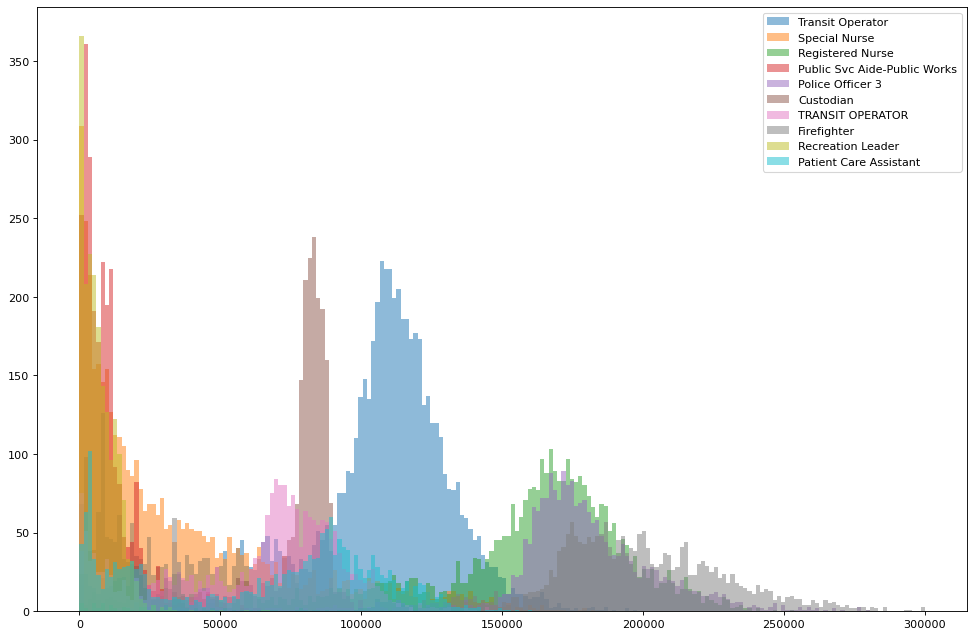

In [40]:
# plotando as distribuições dos benefícios das dez maiores ocupações

from matplotlib import pyplot
%matplotlib inline

bins = 200

from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=80)

for j in jobs:
    ax = pyplot.hist(benefits[benefits['JobTitle'] == j]['TotalPayBenefits'], bins, alpha=0.5, label=j, range=(0,300000))

pyplot.legend(loc='upper right')
pyplot.show()

In [41]:
#média dos Benefícios
benefits_med = benefits['TotalPayBenefits'].mean()


In [42]:
benefits_med

93692.55481056834

In [43]:
#Quantos trabalhadores tem beneficios acima e abaixo da média

<AxesSubplot:>

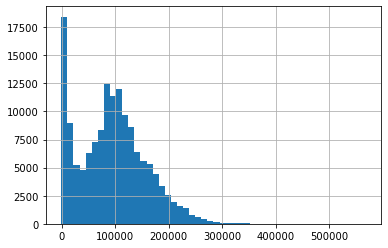

In [44]:
# Plotagem da distribuição dos benefícios
benefits['TotalPayBenefits'].hist(bins=50)

In [45]:
# fazendo o teste de normalidade de shapiro
stats.shapiro(benefits['TotalPayBenefits'])

ShapiroResult(statistic=0.9659102559089661, pvalue=0.0)

O test shapiro-wilks é um indicador de quão bem os nossos dados se ajustam à distribuição normal. 
O primeiro parâmetro da estatística W (quando está próxiomo de 1 a distribuição é Gaussiana), 
e o segundo parâmetro é o p_valor (quando p_valor é maior que 0.05, a distribuição é Gaussiana).

In [46]:
#Pelo teste de Shapiro a distribuição não é normal, por isso vamos utilizar técnicas de transformação para melhorar os resultados

In [47]:
benef_zero = benefits['TotalPayBenefits']==0
benef_zero

0         False
1         False
2         False
3         False
4         False
          ...  
148649     True
148650     True
148651     True
148652     True
148653    False
Name: TotalPayBenefits, Length: 148654, dtype: bool

<AxesSubplot:ylabel='Frequency'>

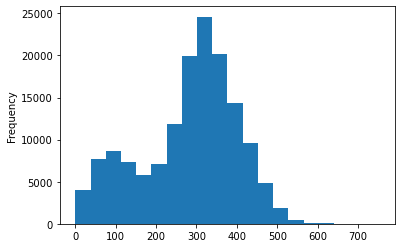

In [48]:
#Não apliquei o log pois, temos valores = 0 dando um resultado paara plotage de -inf
#aplicando o sqrt na série de dados de beneficios e plotando uma distribuição
# transformação matemática de NORMALIZAÇÃO dos dados
benefits['sqrt_TotalPayBenefits'] = np.sqrt(benefits['TotalPayBenefits'])
benefits['sqrt_TotalPayBenefits'].plot.hist(bins=20)


In [49]:
benefits.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,sqrt_TotalPayBenefits
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN,753.389295
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN,734.104407
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN,579.033600
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN,576.492506
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN,571.290810


In [51]:
# fazendo o teste de normalidade de shapiro
stats.shapiro(benefits['sqrt_TotalPayBenefits'])

ShapiroResult(statistic=nan, pvalue=1.0)

In [52]:
#A normalização parece que funcionou

<AxesSubplot:>

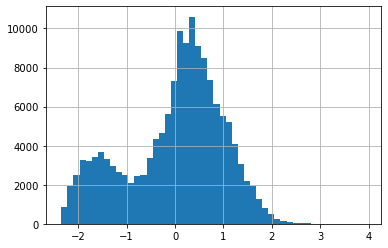

In [55]:
# padronizando os dados da série de salários de "Deputy Sheriff"
benefits['norm_payBen'] = (benefits['sqrt_TotalPayBenefits'] - benefits['sqrt_TotalPayBenefits'].mean()) / benefits['sqrt_TotalPayBenefits'].std()
benefits['norm_payBen'].hist(bins=50)

In [57]:
# verificando o número de observações
len(benefits['norm_payBen'])

148654

In [58]:
# calculando a média e o desvio-padrão dos benefícios
x = benefits['norm_payBen']

mu = np.mean(x)
std = np.std(x)
mu,std

(6.2750268411534845e-15, 0.9999966363885483)

In [59]:
# Verificando o Z-score dos benefícios

scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)

(-1.9599573919827444, 1.9599573919827569)

In [60]:
# Verificando o p-values dos benefícios

scipy.stats.norm(mu, std).pdf(2*std)

0.05399114811843283

In [61]:
#Trabalhadores que ganham abaixo da média de benefícios

In [63]:
# filtro dos beneficios abaixo média com 95% de confiança
benefits[benefits['norm_payBen']<scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)[0]]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,sqrt_TotalPayBenefits,norm_pay,norm_payBen
34670,34671,MAOLIN CAMPOSAGRADO,CLERK,2194.28,0.0,0.0,NaN,2194.28,2194.28,2011,NaN,San Francisco,NaN,46.843143,-1.960166,-1.960166
34671,34672,ERNESTINE CADE-HILL,"SUPERVISING PROBATION OFFICER, JUVENILE COURT",1913.0,0.0,280.92,NaN,2193.92,2193.92,2011,NaN,San Francisco,NaN,46.839300,-1.960198,-1.960198
34672,34673,GERALD ROMANI-JR,PRINCIPAL REAL PROPERTY OFFICER,0.0,0.0,2193.0,NaN,2193.00,2193.00,2011,NaN,San Francisco,NaN,46.829478,-1.960280,-1.960280
34673,34674,JORDAN LI,JUNIOR CLERK,1489.74,701.19,0.0,NaN,2190.93,2190.93,2011,NaN,San Francisco,NaN,46.807371,-1.960464,-1.960464
34674,34675,MEGAN DEA,PUBLIC SERVICE TRAINEE,2189.84,0.0,0.0,NaN,2189.84,2189.84,2011,NaN,San Francisco,NaN,46.795726,-1.960562,-1.960562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT,0.000000,-2.351166,-2.351166
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT,0.000000,-2.351166,-2.351166
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN,0.000000,-2.351166,-2.351166
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN,0.000000,-2.351166,-2.351166


In [64]:
len(benefits[benefits['norm_payBen']<scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)[0]])

5595

5595 trabalhadores tem  befícios menores que a média com 95% de confiança.

In [65]:
#Trabalhadores que ganham acima da média de benefícios

In [66]:
# filtro dos beneficios acima da média com 95% de confiança
benefits[benefits['norm_payBen']>scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)[1]]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,sqrt_TotalPayBenefits,norm_pay,norm_payBen
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN,753.389295,3.937381,3.937381
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN,734.104407,3.776410,3.776410
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN,579.033600,2.482032,2.482032
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN,576.492506,2.460822,2.460822
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN,571.290810,2.417403,2.417403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110829,110830,Robert J Lopez,"Lieutenant, Fire Suppression",131080.06,75065.13,17354.41,43765.08,223499.60,267264.68,2014,NaN,San Francisco,FT,516.976479,1.964041,1.964041
110830,110831,Patricia A Coggan,Nurse Manager,171337.5,0.0,39950.65,55954.55,211288.15,267242.70,2014,NaN,San Francisco,FT,516.955220,1.963863,1.963863
110831,110832,Murray P Daggs,Police Officer 3,118898.13,98583.98,10919.81,38833.08,228401.92,267235.00,2014,NaN,San Francisco,FT,516.947773,1.963801,1.963801
110832,110833,Ann E Mannix,Captain 3,199160.0,1757.97,9590.51,56417.6,210508.48,266926.08,2014,NaN,San Francisco,FT,516.648894,1.961307,1.961307


In [67]:
len(benefits[benefits['norm_payBen']>scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)[1]])

911

911 trabalhadores tem  befícios maiores que a média com 95% de confiança.